# Esame Laboratorio di Programmazione II - 22/07/2025


Scrivete chiaramente sul notebook il vostro nome e matricola e rinominate il file che consegnate come `matricola.ipynb` (la matricola è SMnumeri o ECnumeri).

Per ogni funzione e metodo che richiede un campionamento rispetto ad una distribuzione settate il seed a 0: ``np.random.seed(0)``.

Stampate il risultato delle domande e consegnate il compito eseguito, quindi per cui ogni cella ha il corrispondente output.
Quindi ad esempio

e.g., 
NON scrivete: 
```python 
    lista=np.array([1,2,3])
```
ma 
```python
    lista=np.array([1,2,3]) 
    print('lista =', lista)   
```
Attenzione!Se scrivete:
```python
    lista=np.array([1,2,3])
    lista
```
``lista`` sarà l'unico ouput che si vede di quella cella

NB: Potete usare anche più di una cella python per domanda e se l'output è una matrice molto grande non dovete stamparla.

Sarà valutata anche la presentazione, ad esempio un plot senza etichette sugli assi o illeggibili sarà valutato meno bene di uno con etichette chiare.

Cercate di commmentare il compito di modo che si capisca cosa avete fatto.

Controllate attentamente di avere consegnato il file giusto.

## Esercizio 1

Crea un vettore NumPy con le seguenti spese annuali per l’auto (in euro) sostenute da 7 persone:
3200, 2750, 4100, 3600, 2950, 5100, 4400

1. Calcola la spesa totale complessiva sostenuta dal gruppo.

2. Le persone con spese minori di 3000 € ottengono una detrazione fiscale del 15%. Applica la modifica al vettore.

3. Quanto ha risparmiato il gruppo dopo la detrazione fiscale?


In [3]:
#vettore NumPy 
import numpy as np

auto = np.array([3200, 2750, 4100, 3600, 2950, 5100, 4400], dtype=float)

#1
spesa_totale = auto.sum()
print("La spesa totale complessiva è:", spesa_totale)

#2
auto_copy = auto.copy()
auto_copy[ auto < 3000 ] *= 0.85 #non posso usare *= in un'assegnazione
print("Il vettore dopo la detrazione è:", auto_copy)

#3
#calcolo la spesa totale dopo la detrazione
spesa_finale = auto_copy.sum()
risparmio = spesa_totale - spesa_finale
print("Il gruppo dopo la detrazione ha risparmiato euro: ", risparmio)

#10 minuti

La spesa totale complessiva è: 26100.0
Il vettore dopo la detrazione è: [3200.  2337.5 4100.  3600.  2507.5 5100.  4400. ]
Il gruppo dopo la detrazione ha risparmiato euro:  855.0


## Esercizio 2
1. Scrivi una funzione che simula il lancio di un dado per N volte e restituisce un array con il numero di volte che è uscita ciascuna faccia (da 1 a 6).
2. Calcolare la frequenza % con la dimensione del campione (numero di lanci) 100 volte da 10 a 5000.  Ottieni così 100 array di frequenze.
3. Fai il plot dell’andamento della frequenza media delle facce 1, 3 e 6 in funzione della dimensione del campione.



In [4]:
def lancio_dado (N):
    #creo array che salva le facce uscite per ogni lancio
    facce = np.random.choice(range(1, 7) , size=N) #probabilità uniforme(1/6)

    #creo un array di zeri con 6 caselle in cui salvero le occorrenze
    conteggi = np.zeros(6, dtype=int)
    
    for numero in range(1, 7):
        conteggi[numero-1] = np.sum(facce == numero) #cicla in automatico tutto l'array facce
                                                    #array di True/False dove il valore è uguale a numero
  
    return conteggi

array = lancio_dado(10)
array

array([1, 1, 3, 0, 3, 2])

[30. 10. 10.  0. 40. 10.]
[16.66666667 10.         20.         25.         13.33333333 15.        ]
[16.36363636 18.18181818 19.09090909 12.72727273 10.90909091 22.72727273]
[17.39130435 14.28571429 15.52795031 19.8757764  15.52795031 17.39130435]
[18.00947867 14.21800948 18.00947867 15.63981043 15.63981043 18.48341232]
[14.1221374  16.79389313 15.26717557 19.84732824 16.79389313 17.17557252]
[16.66666667 15.38461538 18.26923077 17.30769231 15.38461538 16.98717949]
[16.85082873 16.02209945 14.91712707 13.8121547  16.85082873 21.54696133]
[16.22276029 17.43341404 17.67554479 17.19128329 16.46489104 15.01210654]
[18.35853132 15.98272138 15.55075594 16.63066955 17.27861771 16.1987041 ]
[16.34241245 15.75875486 17.12062257 15.95330739 18.09338521 16.73151751]
[17.37588652 15.78014184 17.55319149 17.55319149 15.60283688 16.13475177]
[16.61237785 16.61237785 18.40390879 16.7752443  17.91530945 13.68078176]
[14.13533835 16.84210526 18.4962406  17.14285714 17.59398496 15.78947368]
[19.3006993 

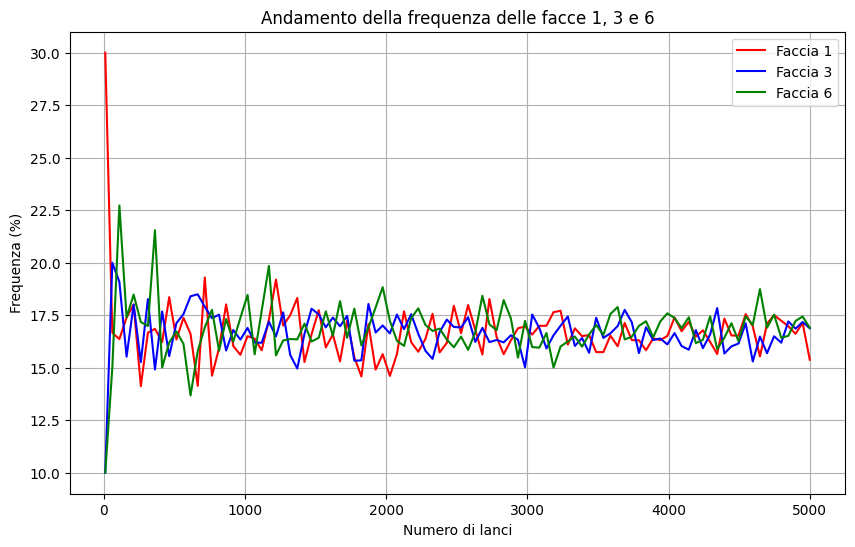

In [6]:
import matplotlib.pyplot as plt
campione = np.linspace(10, 5000, 100, dtype=int) #da 10 a 5000 prende 100 valori equidistanti

#creo liste per salvare le frequenze delle varie facce
freq1 = []
freq3 = []
freq6 = []

for N in campione:
    conteggi = lancio_dado(N) 
    frequenza = conteggi / N * 100
    freq1.append(frequenza[0])
    freq3.append(frequenza[2])
    freq6.append(frequenza[5])
    print(frequenza)

#Fai il plot dell’andamento della frequenza media delle facce 1, 3 e 6 in funzione della dimensione del campione.
plt.figure(figsize=(10, 6))
plt.plot(campione, freq1, label="Faccia 1", color="red")
plt.plot(campione, freq3, label="Faccia 3", color="blue")
plt.plot(campione, freq6, label="Faccia 6", color="green")
plt.title("Andamento della frequenza delle facce 1, 3 e 6")
plt.xlabel("Numero di lanci")
plt.ylabel("Frequenza (%)")
plt.legend()
plt.grid(True)
plt.show()

## Esercizio 3

1. Genera una matrice NumPy di dimensioni 7 x 7, con valori estratti da una distribuzione normale con media = 0, ed std = 5.

2. Per ogni riga, identifica il valore più lontano da zero (cioè con valore assoluto massimo). Crea un array con questi 7 valori (uno per riga).

3. Calcola quante di queste righe hanno il valore più lontano da zero positivo?

In [7]:
#1
np.random.seed(0)
matrice = np.random.normal(loc=0, scale=5, size=(7, 7))
matrice


array([[  8.82026173,   2.00078604,   4.89368992,  11.204466  ,
          9.33778995,  -4.8863894 ,   4.75044209],
       [ -0.75678604,  -0.51609426,   2.05299251,   0.72021786,
          7.27136753,   3.80518863,   0.60837508],
       [  2.21931616,   1.66837164,   7.47039537,  -1.02579132,
          1.56533851,  -4.2704787 , -12.76494908],
       [  3.26809298,   4.32218099,  -3.7108251 ,  11.34877312,
         -7.27182837,   0.22879259,  -0.93591925],
       [  7.66389607,   7.34679385,   0.77473713,   1.8908126 ,
         -4.43892874,  -9.90398234,  -1.73956075],
       [  0.78174485,   6.1514534 ,   6.01189924,  -1.93663409,
         -1.51151375,  -5.24276483,  -7.10008969],
       [ -8.53135095,   9.75387698,  -2.54826091,  -2.19037151,
         -6.2639768 ,   3.88745178,  -8.06948924]])

In [8]:
#2
lontano = []
for riga in matrice:
    indice_max = np.argmax(np.abs(riga - 0))
    num_lontano = riga[indice_max]
    lontano.append(num_lontano)

#trasformo lontano in array
array_lontano = np.array(lontano)
print("Array con i 7 numeri più lontani per riga: ", array_lontano)

Array con i 7 numeri più lontani per riga:  [ 11.204466     7.27136753 -12.76494908  11.34877312  -9.90398234
  -7.10008969   9.75387698]


In [9]:
#3
# Conta quanti valori nell'array sono positivi
num_positivi = np.sum(array_lontano > 0)

print("Numero di valori più lontani da zero che sono positivi:", num_positivi)


Numero di valori più lontani da zero che sono positivi: 4


## Esercizio 4 

Utilizza il dataset cereal.csv.

Contiene dati nutrizionali (proteine, fibre, calorie, zuccheri, ecc.) per circa 70 cereali.


1.  Aggiungi una colonna chiamata `nutri_score`, definita come:
$$
\texttt{nutri\_score} = \frac{\texttt{protein} + \texttt{fiber}}{\texttt{calories}}
$$

Indica quanti nutrienti positivi ci sono per ogni caloria: più è alto, più il cereale è "nutriente a parità di energia.

2. Trova i **5 cereali con il `nutri_score` più alto** e stampali con `name` e `nutri_score`.

3. Filtra i cereali che soddisfano entrambi i criteri:

   - meno di 120 calorie  
   - più di 2 grammi di fibra 


4. **Crea un grafico a barre** dei **10 cereali con il `nutri_score` più alto**, usando `name` sull’asse x.

5. Crea uno **scatter plot** (grafico a punti) che visualizzi:

   - `calories` sull’asse x  
   - `nutri_score` sull’asse y
   - `protein` nel colore dei punti


In [10]:
#carico il dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/lauranenzi/ProgrammingLab_II/refs/heads/main/esami/data/cereal.csv"
df = pd.read_csv(url, sep=';')
df.head()


,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [11]:
#1
df['nutri_score'] = df['protein'] + df['fiber'] /df['calories']
df['nutri_score']

0     4.142857
1     3.016667
2     4.128571
3     4.280000
4     2.009091
        ...   
72    2.000000
73    1.000000
74    3.030000
75    3.030000
76    2.009091
Name: nutri_score, Length: 77, dtype: float64

In [12]:
#2
df = df.sort_values(by="nutri_score", ascending=False)

#prendo i primi 5 cereali ordinati selezionando solo le colonne che voglio
top5_cereali = df.head(5)[["name", "nutri_score"]]
top5_cereali



,name,nutri_score
11,Cheerios,6.018182
67,Special K,6.009091
57,Quaker Oatmeal,5.027000
3,All-Bran with Extra Fiber,4.280000
0,100% Bran,4.142857


In [13]:
#3 
df[ (df['calories'] < 120) & (df['fiber'] > 2.0) ]

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,nutri_score
57,Quaker Oatmeal,Q,H,100,5,2,0,2.7,-1.0,-1,110,0,1,1.00,0.67,50.828392,5.027000
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.00,0.50,93.704912,4.280000
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.00,0.33,68.402973,4.142857
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.00,0.33,59.425505,4.128571
9,Bran Flakes,P,C,90,3,0,210,5.0,13.0,5,190,25,3,1.00,0.67,53.313813,3.055556
64,Shredded Wheat 'n'Bran,N,C,90,3,0,0,4.0,19.0,0,140,0,1,1.00,0.67,74.472949,3.044444
19,Cracklin' Oat Bran,K,C,110,3,3,140,4.0,10.0,7,160,25,3,1.00,0.50,40.448772,3.036364
50,Nutri-grain Wheat,K,C,90,3,0,170,3.0,18.0,2,90,25,3,1.00,1.00,59.642837,3.033333
65,Shredded Wheat spoon size,N,C,90,3,0,0,3.0,20.0,0,120,0,1,1.00,0.67,72.801787,3.033333
32,Grape Nuts Flakes,P,C,100,3,1,140,3.0,15.0,5,85,25,3,1.00,0.88,52.076897,3.030000


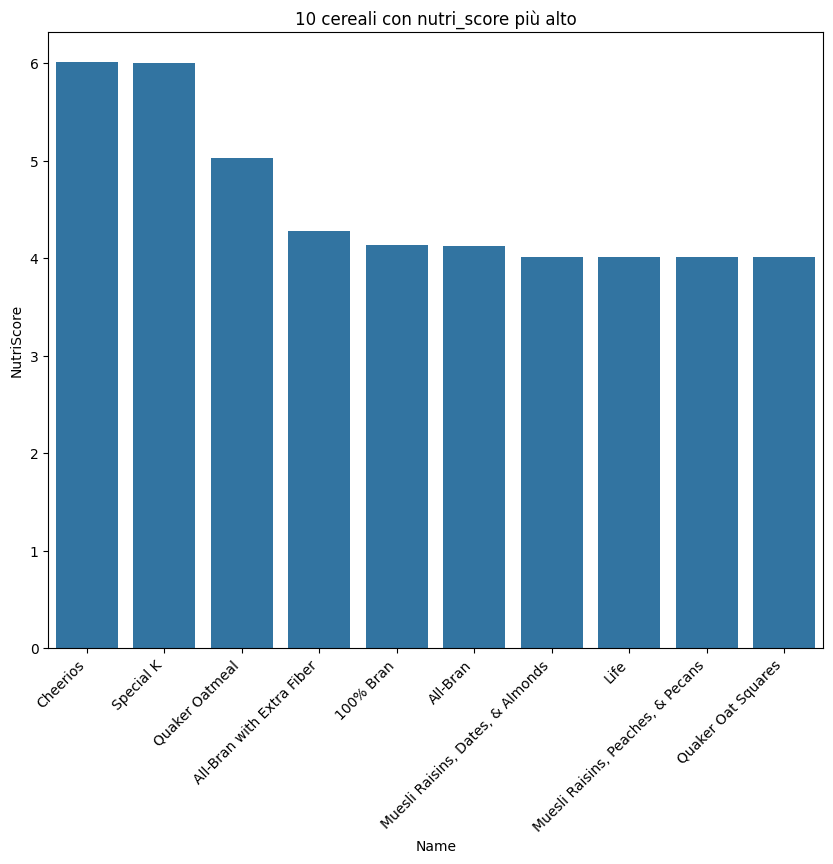

In [14]:
#4
#definisco un insieme di dati da plottare
top10 = df.sort_values(by="nutri_score", ascending=False).head(10)

plt.figure(figsize=(10,8))
sns.barplot(x="name", y="nutri_score", data=top10)
plt.title("10 cereali con nutri_score più alto")
plt.xlabel("Name")
plt.ylabel("NutriScore")
plt.xticks(rotation=45, ha="right")
plt.show()


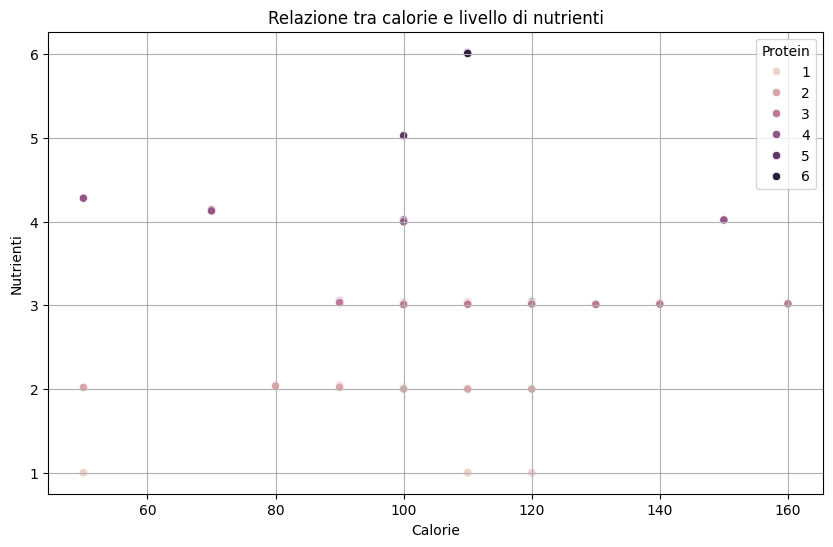

In [15]:
#5 scatterplot
plt.figure(figsize=(10,6))
sns.scatterplot(x="calories", y="nutri_score", hue="protein", data=df)
plt.title("Relazione tra calorie e livello di nutrienti")
plt.xlabel("Calorie")
plt.ylabel("Nutrienti")
plt.grid(True) 
plt.legend(title="Protein")
plt.show()


## Esercizio 5 

Utilizza il dataset `imdb_top_1000.csv`, che contiene informazioni su 1000 film recensiti su IMDB.

1. Quanti **valori mancanti** ci sono per colonna? Elimina le righe con i valori mancanti.

2. Elimina la colonna `Overview`. Aggiungi una colonna (`main_genre`) con solo il primo genere della colonna `genre`. Quali sono i 5 generi più frequenti?

3. Che attore/attrice è stato/a più volte la `Star1` e quello/a che ha fatto più film.

4. Calcola l'IMDB_rating medio e il Gross medio di ogni genere. Fai uno scatter plot dell'IMDB_rating medio e il Gross medio di ogni genere. Riesci a mettere anche l'ettichetta del genere?

5. Visualizza la distribuzione del IMDB_rating  e la distribuzione del `Gross` dei primi 5 main_genre. (Hint fai due violin plot).




In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
url2 = "https://raw.githubusercontent.com/lauranenzi/ProgrammingLab_II/refs/heads/main/esami/data/imdb_top_1000.csv"
ds = pd.read_csv(url2)
ds.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0


In [59]:
#1
print(ds.isna().sum())
ds.dropna()
ds.head()



Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64


,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0


In [60]:
#2
#elimina la colonna Overview
#ds = ds.drop(columns=["Overview"])

ds["main_genre"] = ds["Genre"].str.split(",").str[0] #trasforma la stringa in una lista
print(ds["main_genre"])

#5 generi più frequenti
top5_genres = ds["main_genre"].value_counts().head(5)
print(top5_genres)


0       Drama
1       Crime
2      Action
3       Crime
4       Crime
        ...  
995    Comedy
996     Drama
997     Drama
998     Drama
999     Crime
Name: main_genre, Length: 1000, dtype: object
main_genre
Drama        289
Action       172
Comedy       155
Crime        107
Biography     88
Name: count, dtype: int64


In [61]:
#3
top_star = ds['Star1'].value_counts().head(1)
print(top_star)

Star1
Tom Hanks    12
Name: count, dtype: int64


In [62]:
#4
ds = ds.dropna(subset=["IMDB_Rating", "Gross", "main_genre"])
grouped1 = ds.groupby('main_genre')
media_1 = grouped1[['IMDB_Rating', 'Gross']].mean()
print(media_1)



            IMDB_Rating         Gross
main_genre                           
Action         7.948227  1.419631e+08
Adventure      7.936066  8.645499e+07
Animation      7.922388  1.279675e+08
Biography      7.925316  6.012873e+07
Comedy         7.900781  3.253759e+07
Crime          8.021505  3.419123e+07
Drama          7.949145  3.867728e+07
Family         7.800000  2.195553e+08
Film-Noir      8.050000  1.278626e+06
Horror         7.930000  7.358577e+07
Mystery        8.066667  3.043953e+07
Thriller       7.800000  1.755074e+07
Western        8.350000  1.455538e+07


C:\Users\conta\AppData\Local\Temp\ipykernel_22200\3725851080.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  media_1['IMDB_Rating'][i] + 0.01,  # leggero spostamento a destra
C:\Users\conta\AppData\Local\Temp\ipykernel_22200\3725851080.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  media_1['Gross'][i] + 0.01,        # leggero spostamento verso l'alto


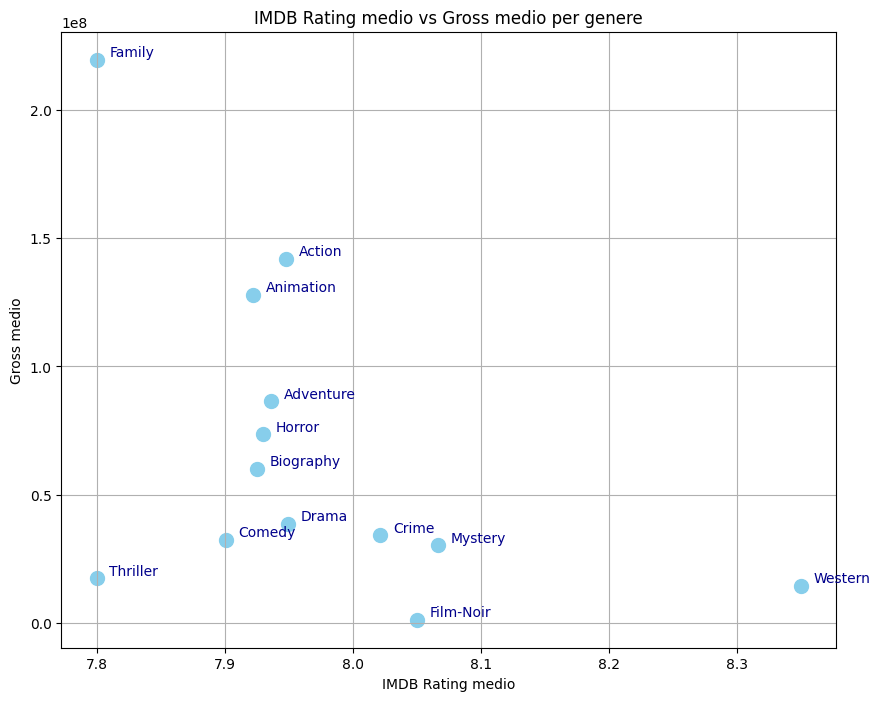

In [63]:
plt.figure(figsize=(10,8))
plt.scatter(media_1['IMDB_Rating'], media_1['Gross'], s=100, color='skyblue')
#etichette
for i in range(len(media_1)):
    plt.text(
        media_1['IMDB_Rating'][i] + 0.01,  # leggero spostamento a destra
        media_1['Gross'][i] + 0.01,        # leggero spostamento verso l'alto
        media_1.index[i],          # testo = nome del genere
        fontsize=10,
        color='darkblue',
        ha='left',  # allineamento orizzontale
        va='bottom' # allineamento verticale
    )
plt.title("IMDB Rating medio vs Gross medio per genere")
plt.xlabel("IMDB Rating medio")
plt.ylabel("Gross medio")
plt.grid(True)
plt.show()

C:\Users\conta\AppData\Local\Temp\ipykernel_22200\2850395957.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="main_genre", y="IMDB_Rating", data=ds_top5, palette="pastel")


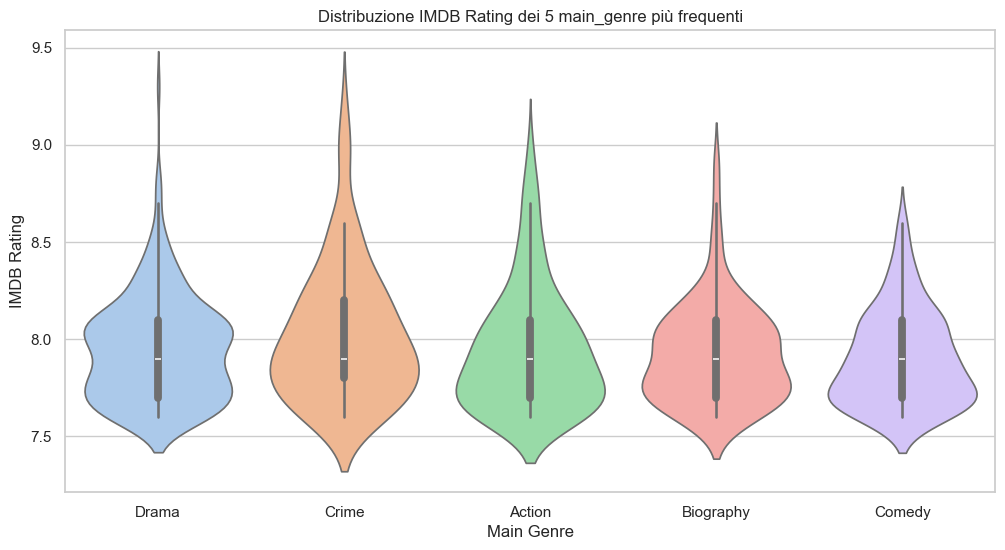

C:\Users\conta\AppData\Local\Temp\ipykernel_22200\2850395957.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="main_genre", y="Gross", data=ds_top5, palette="pastel")


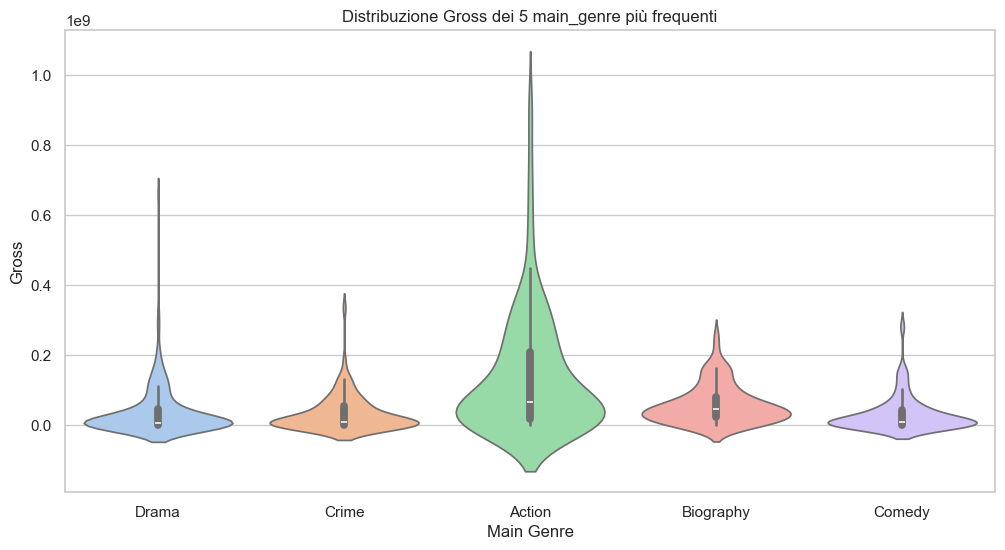

In [70]:
#5
top5_generi = ds['main_genre'].value_counts().head(5)

#filtro il dataframe creando un secondo con i soli dati dei 5 generi che ci interessano
ds_top5 = ds[ ds['main_genre'].isin(top5_generi.index)] #condizione booleana che filtra il dataframe

sns.set(style="whitegrid")  # stile del grafico
# IMDB Rating
plt.figure(figsize=(12,6))
sns.violinplot(x="main_genre", y="IMDB_Rating", data=ds_top5, palette="pastel")
plt.title("Distribuzione IMDB Rating dei 5 main_genre più frequenti")
plt.xlabel("Main Genre")
plt.ylabel("IMDB Rating")
plt.show()

# Gross
plt.figure(figsize=(12,6))
sns.violinplot(x="main_genre", y="Gross", data=ds_top5, palette="pastel")
plt.title("Distribuzione Gross dei 5 main_genre più frequenti")
plt.xlabel("Main Genre")
plt.ylabel("Gross")
plt.show()


## Esercizio 6

Considera i seguenti dati, che :

`x = np.linspace(0, 10, 100)`  
`y = -3.5 * x + 2 + np.random.normal(0, 10, 100)`

Cerca di riprodurre la retta fittando i parametri della funzione y = ax + b.

1. Stima i parametri della retta.
2. Calcola l’intervallo di confidenza al 95% dei parametri a e b.
N.B il secondo output del metodo curve_fit è proprio la matrice di covarianza: `params, cov = curve_fit(retta, x, y)`. 
L'**errore standard** di ciascun parametro si calcola come:

$$
\text{errore\_standard}_i = \sqrt{\text{cov}(i, i)}
$$

dove $\text{cov}(i, i)$ è l'elemento diagonale $i$-esimo della **matrice di covarianza**.

L’**intervallo di confidenza al 95%** si approssima con:

$$
\text{parametro}_i \pm 1.96 \times \text{errore\_standard}_i
$$
3. Plotta i punti originali e la retta ottenuta con anche l'intervallo di confidenza

Parametri stimati: a = -3.362, b = 0.272
Intervallo di confidenza al 95% per a: (np.float64(-3.9750440188713867), np.float64(-2.749090672318202))
Intervallo di confidenza al 95% per b: (np.float64(-3.276076782218631), np.float64(3.8198199721845194))


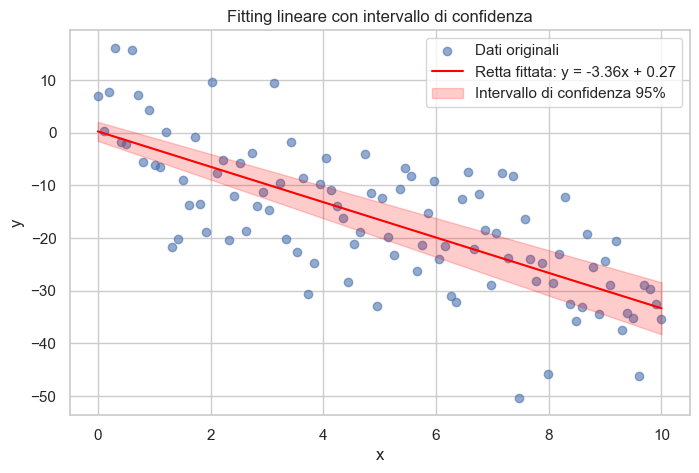

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

np.random.seed(42) 
x = np.linspace(0, 10, 100)
y = -3.5 * x + 2 + np.random.normal(0, 10, 100)

#Definisco la funzione lineare
def retta(x, a, b):
    return a * x + b

#Fit della retta
params, cov = curve_fit(retta, x, y)
a, b = params

print(f"Parametri stimati: a = {a:.3f}, b = {b:.3f}")
#2 errore standard di ciascun parametro
sigma_a, sigma_b = np.sqrt(np.diag(cov))
#intervallo di confidenza di ciascun parametro
conf_int_a = (a - 1.96*sigma_a, a + 1.96*sigma_a)
conf_int_b = (b - 1.96*sigma_b, b + 1.96*sigma_b)

print(f"Intervallo di confidenza al 95% per a: {conf_int_a}")
print("Intervallo di confidenza al 95% per b: {}".format(conf_int_b))

#Valori della retta fittata e bande di confidenza
y_fit = retta(x, a, b)

y_upper = retta(x, a + sigma_a, b + sigma_b)
y_lower = retta(x, a - sigma_a, b - sigma_b)

#Plot dei dati e della retta fittata con intervallo di confidenza
plt.figure(figsize=(8,5))
plt.scatter(x, y, alpha=0.6, label="Dati originali")
plt.plot(x, y_fit, color="red", label=f"Retta fittata: y = {a:.2f}x + {b:.2f}")


plt.fill_between(x, y_lower, y_upper, color='red', alpha=0.2, label="Intervallo di confidenza 95%")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Fitting lineare con intervallo di confidenza")
plt.legend()
plt.show()
